In [ ]:
!pip install chess
import numpy as np
import random
import chess
import chess.svg

numberOfQueens = 8
maxPopSize = 1000
maxIterations = 10000
mutationProbability = 0.5

     |████████████████████████████████| 143kB 5.9MB/s 


In [ ]:
class Queens:
    #initialize the genotype and fitness of board.
    def __init__ (self, genotype, fitness):
        self.genotype = genotype
        self.fitness = fitness
    def updateFitness(self, fitness):
        self.fitness = fitness
    def updateGenotype(self, genotype):
        self.genotype = genotype
    def getFitness(self):
        return self.fitness
    def getGenotype(self):
        return self.genotype
    

In [ ]:
def get_fitness(genotype):
  attacks = 0
  #check for row and column checks by seeing how many unique numbers are in the list. if no attacks there should be 8 unique numbers, so 0 attacks.
  up_down_attacks = abs(len(genotype) - len(np.unique(genotype))) 

  #check for diagonal attacks
  for i in range(len(genotype)):
    for j in range(len(genotype)):
      x = abs(i-j)
      y = abs(genotype[i] - genotype[j])
      if (i != j and x == y):
        attacks += 1
  attacks += up_down_attacks
  return 28 - attacks

In [ ]:
def init_population(populationSize,numberOfQueens):
  populationList = list() #empty list to make N chessboards based on passed in number
  for offspring in range(populationSize):
    #make list of numbers 0-7, shuffle them
    genotype = np.arange(numberOfQueens) 
    np.random.shuffle(genotype)
    fitness = get_fitness(genotype)
    #print("------------INIT POPULATUIONM----------")
    #print(fitness)
    populationList.append(Queens(genotype, fitness))
  return populationList

  ## POTENTIAL BUG

In [ ]:
def mutation(offspring):
  global mutationProbability #access global variable containing probability to mutate

  randNum = random.random()
  if (randNum <= mutationProbability):
    i1, i2 = random.sample(range(len(offspring.genotype)), 2)
    genotype = offspring.genotype
    genotype[i1], genotype[i2] = genotype[i2], genotype[i1] 
    offspring.updateGenotype(genotype)
    offspring.updateFitness(get_fitness(genotype))
    return offspring
  return offspring

In [ ]:
def recombination(parentA, parentB):
  cutPoint = np.random.randint(len(parentA))
  genotype1 = np.append(parentA[0:cutPoint],parentB[cutPoint:])
  genotype2 = np.append(parentB[0:cutPoint],parentA[cutPoint:])
  return (Queens(genotype1, get_fitness(genotype1)), Queens(genotype2, get_fitness(genotype2)))

In [ ]:
def selection():
  global population
  parents = np.random.choice(population, size=5)
  parents = parents.tolist()
  parents.sort(key=lambda x: x.fitness, reverse=True)
  offspring = recombination(parents[0].genotype,parents[1].genotype)

  offspring1 = mutation(offspring[0])
  offspring2 = mutation(offspring[1])

  #Replace 2 of population with the new children
  population.sort(key=lambda x: x.fitness, reverse=True)

  #for index,member in population:  #PYTHON NOT LETTING ME ITERATE OVER MY CLASS, AND I FORGOT HOW
  for index in range(len(population)):
    if (population[index].fitness < offspring1.fitness):
      population[index] = offspring1
      break
  #for index,member in population: #PYTHON NOT LETTING ME ITERATE OVER MY CLASS, AND I FORGOT HOW
  for index in range(len(population)):
    if (population[index].fitness < offspring2.fitness):
      population[index] = offspring2
      break

In [ ]:
population = init_population(maxPopSize,numberOfQueens)

for iteration in range(maxIterations):
  selection()

print(len(population))
population.sort(key=lambda x: x.fitness, reverse=True)

1000


In [ ]:
print(population[0].genotype)

[3 1 6 4 0 7 5 2]


In [ ]:
for index in range(len(population)):
  print(population[index].fitness)

28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
2

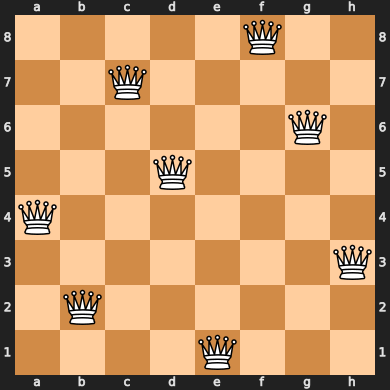

In [ ]:

chessString = ""
templist = population[0].genotype.tolist()
for idx in range(7,-1,-1):
    temp = templist.index(idx)
    if temp == 0:
        chessString += "Q" + str(7-temp)
    elif temp == 7:
        chessString += str(temp) + "Q"
    else:
        chessString += str(temp) + "Q" + str(7-temp)
    if idx != 0:
        chessString += "/"
    
    
board = chess.Board(chessString)
board
#chess.svg.board(board,size=325)  

In [ ]:
temp = []
for index in range(len(population)):
  if population[index].fitness == 28:

    temp.append(population[index].genotype.tolist())


unique_data = [list(x) for x in set(tuple(x) for x in temp)]
unique_data

[[1, 3, 5, 7, 2, 0, 6, 4],
 [5, 0, 4, 1, 7, 2, 6, 3],
 [1, 5, 0, 6, 3, 7, 2, 4],
 [2, 7, 3, 6, 0, 5, 1, 4],
 [3, 5, 7, 1, 6, 0, 2, 4],
 [3, 1, 6, 4, 0, 7, 5, 2]]

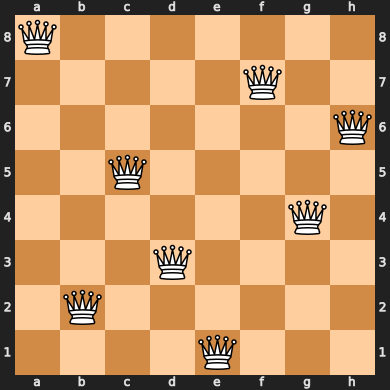

In [ ]:
pop_1k_mut_80 = unique_data
board1 = board
board1
#IGNORE THIS BLOCK I GOOFED UP DONT TOUCH IT PLEASE

Population Size: 100


Mutation probability: 80%


Number of Iterations: 10,000


Number of Correct Solutions: 100


Number of Unique Solutions: 1

[[1, 5, 0, 6, 3, 7, 2, 4]]


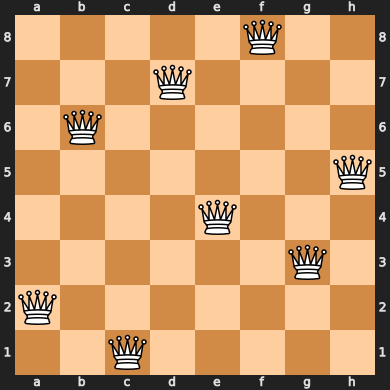

In [ ]:
pop_100_mut_80 = unique_data
board2 = board
print(pop_100_mut_80)
board2


Population Size: 100


Mutation probability: 50%


Number of Iterations: 10,000


Number of Correct Solutions: 100


Number of Unique Solutions: 1

[[2, 7, 3, 6, 0, 5, 1, 4]]


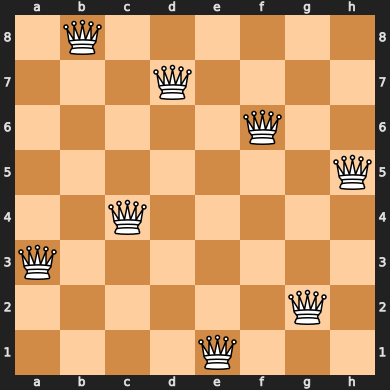

In [ ]:
pop_100_mut_50 = unique_data
board3 = board
print(pop_100_mut_50)
board3


Population Size: 1,000


Mutation probability: 50%


Number of Iterations: 10,000


Number of Correct Solutions: 1,000


Number of Unique Solutions: 6

[[1, 3, 5, 7, 2, 0, 6, 4], [5, 0, 4, 1, 7, 2, 6, 3], [1, 5, 0, 6, 3, 7, 2, 4], [2, 7, 3, 6, 0, 5, 1, 4], [3, 5, 7, 1, 6, 0, 2, 4], [3, 1, 6, 4, 0, 7, 5, 2]]


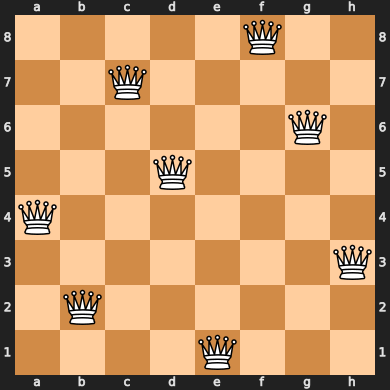

In [ ]:
pop_1k_mut_50 = unique_data
board4 = board
print(pop_1k_mut_50)
board4

Population Size: 1,000


Mutation probability: 80%


Number of Iterations: 10,000


Number of Correct Solutions: 40


Number of Unique Solutions: 8

[[7, 1, 4, 2, 0, 6, 3, 5], [4, 1, 3, 5, 7, 2, 0, 6], [4, 6, 0, 2, 7, 5, 3, 1], [4, 6, 1, 3, 7, 0, 2, 5], [6, 2, 7, 1, 4, 0, 5, 3], [5, 2, 0, 7, 3, 1, 6, 4], [4, 0, 7, 5, 2, 6, 1, 3], [3, 1, 6, 2, 5, 7, 4, 0]]


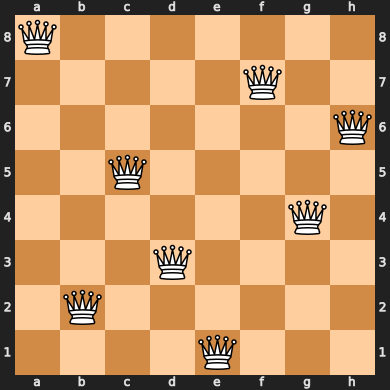

In [ ]:
print(pop_1k_mut_80)
board1

<svg height="350" version="1.1" viewBox="0 0 390 390" width="350" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><defs><g class="white knight" fill="none" fill-rule="evenodd" id="white-knight" stroke="#000" stroke-linecap="round" stroke-linejoin="round" stroke-width="1.5"><path d="M 22,10 C 32.5,11 38.5,18 38,39 L 15,39 C 15,30 25,32.5 23,18" style="fill:#ffffff; stroke:#000000;" /><path d="M 24,18 C 24.38,20.91 18.45,25.37 16,27 C 13,29 13.18,31.34 11,31 C 9.958,30.06 12.41,27.96 11,28 C 10,28 11.19,29.23 10,30 C 9,30 5.997,31 6,26 C 6,24 12,14 12,14 C 12,14 13.89,12.1 14,10.5 C 13.27,9.506 13.5,8.5 13.5,7.5 C 14.5,6.5 16.5,10 16.5,10 L 18.5,10 C 18.5,10 19.28,8.008 21,7 C 22,7 22,10 22,10" style="fill:#ffffff; stroke:#000000;" /><path d="M 9.5 25.5 A 0.5 0.5 0 1 1 8.5,25.5 A 0.5 0.5 0 1 1 9.5 25.5 z" style="fill:#000000; stroke:#000000;" /><path d="M 15 15.5 A 0.5 1.5 0 1 1 14,15.5 A 0.5 1.5 0 1 1 15 15.5 z" style="fill:#000000; stroke:#000000;" transform="matrix(0.866,0.5,-0.5,0.866,9.693,-5.173)" /></g><g id="xx"><path d="M35.865 9.135a1.89 1.89 0 0 1 0 2.673L25.173 22.5l10.692 10.692a1.89 1.89 0 0 1 0 2.673 1.89 1.89 0 0 1-2.673 0L22.5 25.173 11.808 35.865a1.89 1.89 0 0 1-2.673 0 1.89 1.89 0 0 1 0-2.673L19.827 22.5 9.135 11.808a1.89 1.89 0 0 1 0-2.673 1.89 1.89 0 0 1 2.673 0L22.5 19.827 33.192 9.135a1.89 1.89 0 0 1 2.673 0z" fill="#000" stroke="#fff" stroke-width="1.688" /></g></defs><rect fill="#212121" height="390" width="390" x="0" y="0" /><rect class="square dark a1" fill="#d18b47" height="45" stroke="none" width="45" x="15" y="330" /><rect class="square light b1" fill="#ffce9e" height="45" stroke="none" width="45" x="60" y="330" /><rect class="square dark c1" fill="#d18b47" height="45" stroke="none" width="45" x="105" y="330" /><rect class="square light d1" fill="#ffce9e" height="45" stroke="none" width="45" x="150" y="330" /><rect class="square dark e1" fill="#d18b47" height="45" stroke="none" width="45" x="195" y="330" /><rect class="square light f1" fill="#ffce9e" height="45" stroke="none" width="45" x="240" y="330" /><rect class="square dark g1" fill="#d18b47" height="45" stroke="none" width="45" x="285" y="330" /><rect class="square light h1" fill="#ffce9e" height="45" stroke="none" width="45" x="330" y="330" /><rect class="square light a2" fill="#ffce9e" height="45" stroke="none" width="45" x="15" y="285" /><rect class="square dark b2" fill="#d18b47" height="45" stroke="none" width="45" x="60" y="285" /><rect class="square light c2" fill="#ffce9e" height="45" stroke="none" width="45" x="105" y="285" /><rect class="square dark d2" fill="#d18b47" height="45" stroke="none" width="45" x="150" y="285" /><use x="150" xlink:href="#xx" y="285" /><rect class="square light e2" fill="#ffce9e" height="45" stroke="none" width="45" x="195" y="285" /><rect class="square dark f2" fill="#d18b47" height="45" stroke="none" width="45" x="240" y="285" /><use x="240" xlink:href="#xx" y="285" /><rect class="square light g2" fill="#ffce9e" height="45" stroke="none" width="45" x="285" y="285" /><rect class="square dark h2" fill="#d18b47" height="45" stroke="none" width="45" x="330" y="285" /><rect class="square dark a3" fill="#d18b47" height="45" stroke="none" width="45" x="15" y="240" /><rect class="square light b3" fill="#ffce9e" height="45" stroke="none" width="45" x="60" y="240" /><rect class="square dark c3" fill="#d18b47" height="45" stroke="none" width="45" x="105" y="240" /><use x="105" xlink:href="#xx" y="240" /><rect class="square light d3" fill="#ffce9e" height="45" stroke="none" width="45" x="150" y="240" /><rect class="square dark e3" fill="#d18b47" height="45" stroke="none" width="45" x="195" y="240" /><rect class="square light f3" fill="#ffce9e" height="45" stroke="none" width="45" x="240" y="240" /><rect class="square dark g3" fill="#d18b47" height="45" stroke="none" width="45" x="285" y="240" /><use x="285" xlink:href="#xx" y="240" /><rect class="square light h3" fill="#ffce9e" height="45" stroke="none" width="45" x="330" y="240" /><rect class="square light a4" fill="#ffce9e" height="45" stroke="none" width="45" x="15" y="195" /><rect class="square dark b4" fill="#d18b47" height="45" stroke="none" width="45" x="60" y="195" /><rect class="square light c4" fill="#ffce9e" height="45" stroke="none" width="45" x="105" y="195" /><rect class="square dark d4" fill="#d18b47" height="45" stroke="none" width="45" x="150" y="195" /><rect class="square light e4" fill="#ffce9e" height="45" stroke="none" width="45" x="195" y="195" /><use transform="translate(195, 195)" xlink:href="#white-knight" /><rect class="square dark f4" fill="#d18b47" height="45" stroke="none" width="45" x="240" y="195" /><rect class="square light g4" fill="#ffce9e" height="45" stroke="none" width="45" x="285" y="195" /><rect class="square dark h4" fill="#d18b47" height="45" stroke="none" width="45" x="330" y="195" /><rect class="square dark a5" fill="#d18b47" height="45" stroke="none" width="45" x="15" y="150" /><rect class="square light b5" fill="#ffce9e" height="45" stroke="none" width="45" x="60" y="150" /><rect class="square dark c5" fill="#d18b47" height="45" stroke="none" width="45" x="105" y="150" /><use x="105" xlink:href="#xx" y="150" /><rect class="square light d5" fill="#ffce9e" height="45" stroke="none" width="45" x="150" y="150" /><rect class="square dark e5" fill="#d18b47" height="45" stroke="none" width="45" x="195" y="150" /><rect class="square light f5" fill="#ffce9e" height="45" stroke="none" width="45" x="240" y="150" /><rect class="square dark g5" fill="#d18b47" height="45" stroke="none" width="45" x="285" y="150" /><use x="285" xlink:href="#xx" y="150" /><rect class="square light h5" fill="#ffce9e" height="45" stroke="none" width="45" x="330" y="150" /><rect class="square light a6" fill="#ffce9e" height="45" stroke="none" width="45" x="15" y="105" /><rect class="square dark b6" fill="#d18b47" height="45" stroke="none" width="45" x="60" y="105" /><rect class="square light c6" fill="#ffce9e" height="45" stroke="none" width="45" x="105" y="105" /><rect class="square dark d6" fill="#d18b47" height="45" stroke="none" width="45" x="150" y="105" /><use x="150" xlink:href="#xx" y="105" /><rect class="square light e6" fill="#ffce9e" height="45" stroke="none" width="45" x="195" y="105" /><rect class="square dark f6" fill="#d18b47" height="45" stroke="none" width="45" x="240" y="105" /><use x="240" xlink:href="#xx" y="105" /><rect class="square light g6" fill="#ffce9e" height="45" stroke="none" width="45" x="285" y="105" /><rect class="square dark h6" fill="#d18b47" height="45" stroke="none" width="45" x="330" y="105" /><rect class="square dark a7" fill="#d18b47" height="45" stroke="none" width="45" x="15" y="60" /><rect class="square light b7" fill="#ffce9e" height="45" stroke="none" width="45" x="60" y="60" /><rect class="square dark c7" fill="#d18b47" height="45" stroke="none" width="45" x="105" y="60" /><rect class="square light d7" fill="#ffce9e" height="45" stroke="none" width="45" x="150" y="60" /><rect class="square dark e7" fill="#d18b47" height="45" stroke="none" width="45" x="195" y="60" /><rect class="square light f7" fill="#ffce9e" height="45" stroke="none" width="45" x="240" y="60" /><rect class="square dark g7" fill="#d18b47" height="45" stroke="none" width="45" x="285" y="60" /><rect class="square light h7" fill="#ffce9e" height="45" stroke="none" width="45" x="330" y="60" /><rect class="square light a8" fill="#ffce9e" height="45" stroke="none" width="45" x="15" y="15" /><rect class="square dark b8" fill="#d18b47" height="45" stroke="none" width="45" x="60" y="15" /><rect class="square light c8" fill="#ffce9e" height="45" stroke="none" width="45" x="105" y="15" /><rect class="square dark d8" fill="#d18b47" height="45" stroke="none" width="45" x="150" y="15" /><rect class="square light e8" fill="#ffce9e" height="45" stroke="none" width="45" x="195" y="15" /><rect class="square dark f8" fill="#d18b47" height="45" stroke="none" width="45" x="240" y="15" /><rect class="square light g8" fill="#ffce9e" height="45" stroke="none" width="45" x="285" y="15" /><rect class="square dark h8" fill="#d18b47" height="45" stroke="none" width="45" x="330" y="15" /><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(20, 0) scale(0.75, 0.75)"><path d="M23.328 10.016q-1.742 0-2.414.398-.672.398-.672 1.36 0 .765.5 1.218.508.445 1.375.445 1.196 0 1.914-.843.727-.852.727-2.258v-.32zm2.867-.594v4.992h-1.437v-1.328q-.492.797-1.227 1.18-.734.375-1.797.375-1.343 0-2.14-.75-.79-.758-.79-2.024 0-1.476.985-2.226.992-.75 2.953-.75h2.016V8.75q0-.992-.656-1.531-.649-.547-1.829-.547-.75 0-1.46.18-.711.18-1.368.539V6.062q.79-.304 1.532-.453.742-.156 1.445-.156 1.898 0 2.836.984.937.985.937 2.985z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(20, 375) scale(0.75, 0.75)"><path d="M23.328 10.016q-1.742 0-2.414.398-.672.398-.672 1.36 0 .765.5 1.218.508.445 1.375.445 1.196 0 1.914-.843.727-.852.727-2.258v-.32zm2.867-.594v4.992h-1.437v-1.328q-.492.797-1.227 1.18-.734.375-1.797.375-1.343 0-2.14-.75-.79-.758-.79-2.024 0-1.476.985-2.226.992-.75 2.953-.75h2.016V8.75q0-.992-.656-1.531-.649-.547-1.829-.547-.75 0-1.46.18-.711.18-1.368.539V6.062q.79-.304 1.532-.453.742-.156 1.445-.156 1.898 0 2.836.984.937.985.937 2.985z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(65, 0) scale(0.75, 0.75)"><path d="M24.922 10.047q0-1.586-.656-2.485-.649-.906-1.79-.906-1.14 0-1.796.906-.649.899-.649 2.485 0 1.586.649 2.492.656.898 1.797.898 1.14 0 1.789-.898.656-.906.656-2.492zm-4.89-3.055q.452-.781 1.14-1.156.695-.383 1.656-.383 1.594 0 2.586 1.266 1 1.265 1 3.328 0 2.062-1 3.328-.992 1.266-2.586 1.266-.96 0-1.656-.375-.688-.383-1.14-1.164v1.312h-1.446V2.258h1.445z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(65, 375) scale(0.75, 0.75)"><path d="M24.922 10.047q0-1.586-.656-2.485-.649-.906-1.79-.906-1.14 0-1.796.906-.649.899-.649 2.485 0 1.586.649 2.492.656.898 1.797.898 1.14 0 1.789-.898.656-.906.656-2.492zm-4.89-3.055q.452-.781 1.14-1.156.695-.383 1.656-.383 1.594 0 2.586 1.266 1 1.265 1 3.328 0 2.062-1 3.328-.992 1.266-2.586 1.266-.96 0-1.656-.375-.688-.383-1.14-1.164v1.312h-1.446V2.258h1.445z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(110, 0) scale(0.75, 0.75)"><path d="M25.96 6v1.344q-.608-.336-1.226-.5-.609-.172-1.234-.172-1.398 0-2.172.89-.773.883-.773 2.485 0 1.601.773 2.492.774.883 2.172.883.625 0 1.234-.164.618-.172 1.227-.508v1.328q-.602.281-1.25.422-.64.14-1.367.14-1.977 0-3.14-1.242-1.165-1.242-1.165-3.351 0-2.14 1.172-3.367 1.18-1.227 3.227-1.227.664 0 1.296.14.633.134 1.227.407z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(110, 375) scale(0.75, 0.75)"><path d="M25.96 6v1.344q-.608-.336-1.226-.5-.609-.172-1.234-.172-1.398 0-2.172.89-.773.883-.773 2.485 0 1.601.773 2.492.774.883 2.172.883.625 0 1.234-.164.618-.172 1.227-.508v1.328q-.602.281-1.25.422-.64.14-1.367.14-1.977 0-3.14-1.242-1.165-1.242-1.165-3.351 0-2.14 1.172-3.367 1.18-1.227 3.227-1.227.664 0 1.296.14.633.134 1.227.407z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(155, 0) scale(0.75, 0.75)"><path d="M24.973 6.992V2.258h1.437v12.156h-1.437v-1.312q-.453.78-1.149 1.164-.687.375-1.656.375-1.586 0-2.586-1.266-.992-1.266-.992-3.328 0-2.063.992-3.328 1-1.266 2.586-1.266.969 0 1.656.383.696.375 1.149 1.156zm-4.899 3.055q0 1.586.649 2.492.656.898 1.797.898 1.14 0 1.796-.898.657-.906.657-2.492 0-1.586-.657-2.485-.656-.906-1.796-.906-1.141 0-1.797.906-.649.899-.649 2.485z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(155, 375) scale(0.75, 0.75)"><path d="M24.973 6.992V2.258h1.437v12.156h-1.437v-1.312q-.453.78-1.149 1.164-.687.375-1.656.375-1.586 0-2.586-1.266-.992-1.266-.992-3.328 0-2.063.992-3.328 1-1.266 2.586-1.266.969 0 1.656.383.696.375 1.149 1.156zm-4.899 3.055q0 1.586.649 2.492.656.898 1.797.898 1.14 0 1.796-.898.657-.906.657-2.492 0-1.586-.657-2.485-.656-.906-1.796-.906-1.141 0-1.797.906-.649.899-.649 2.485z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(200, 0) scale(0.75, 0.75)"><path d="M26.555 9.68v.703h-6.61q.094 1.484.89 2.265.806.774 2.235.774.828 0 1.602-.203.781-.203 1.547-.61v1.36q-.774.328-1.586.5-.813.172-1.649.172-2.093 0-3.32-1.22-1.219-1.218-1.219-3.296 0-2.148 1.157-3.406 1.164-1.266 3.132-1.266 1.766 0 2.79 1.14 1.03 1.134 1.03 3.087zm-1.438-.422q-.015-1.18-.664-1.883-.64-.703-1.703-.703-1.203 0-1.93.68-.718.68-.828 1.914z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(200, 375) scale(0.75, 0.75)"><path d="M26.555 9.68v.703h-6.61q.094 1.484.89 2.265.806.774 2.235.774.828 0 1.602-.203.781-.203 1.547-.61v1.36q-.774.328-1.586.5-.813.172-1.649.172-2.093 0-3.32-1.22-1.219-1.218-1.219-3.296 0-2.148 1.157-3.406 1.164-1.266 3.132-1.266 1.766 0 2.79 1.14 1.03 1.134 1.03 3.087zm-1.438-.422q-.015-1.18-.664-1.883-.64-.703-1.703-.703-1.203 0-1.93.68-.718.68-.828 1.914z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(245, 0) scale(0.75, 0.75)"><path d="M25.285 2.258v1.195H23.91q-.773 0-1.078.313-.297.312-.297 1.125v.773h2.367v1.117h-2.367v7.633H21.09V6.781h-1.375V5.664h1.375v-.61q0-1.46.68-2.124.68-.672 2.156-.672z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(245, 375) scale(0.75, 0.75)"><path d="M25.285 2.258v1.195H23.91q-.773 0-1.078.313-.297.312-.297 1.125v.773h2.367v1.117h-2.367v7.633H21.09V6.781h-1.375V5.664h1.375v-.61q0-1.46.68-2.124.68-.672 2.156-.672z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(290, 0) scale(0.75, 0.75)"><path d="M24.973 9.937q0-1.562-.649-2.421-.64-.86-1.804-.86-1.157 0-1.805.86-.64.859-.64 2.421 0 1.555.64 2.415.648.859 1.805.859 1.164 0 1.804-.86.649-.859.649-2.414zm1.437 3.391q0 2.234-.992 3.32-.992 1.094-3.04 1.094-.757 0-1.429-.117-.672-.11-1.304-.344v-1.398q.632.344 1.25.508.617.164 1.257.164 1.414 0 2.118-.743.703-.734.703-2.226v-.711q-.446.773-1.141 1.156-.695.383-1.664.383-1.61 0-2.594-1.227-.984-1.226-.984-3.25 0-2.03.984-3.257.985-1.227 2.594-1.227.969 0 1.664.383t1.14 1.156V5.664h1.438z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(290, 375) scale(0.75, 0.75)"><path d="M24.973 9.937q0-1.562-.649-2.421-.64-.86-1.804-.86-1.157 0-1.805.86-.64.859-.64 2.421 0 1.555.64 2.415.648.859 1.805.859 1.164 0 1.804-.86.649-.859.649-2.414zm1.437 3.391q0 2.234-.992 3.32-.992 1.094-3.04 1.094-.757 0-1.429-.117-.672-.11-1.304-.344v-1.398q.632.344 1.25.508.617.164 1.257.164 1.414 0 2.118-.743.703-.734.703-2.226v-.711q-.446.773-1.141 1.156-.695.383-1.664.383-1.61 0-2.594-1.227-.984-1.226-.984-3.25 0-2.03.984-3.257.985-1.227 2.594-1.227.969 0 1.664.383t1.14 1.156V5.664h1.438z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(335, 0) scale(0.75, 0.75)"><path d="M26.164 9.133v5.281h-1.437V9.18q0-1.243-.485-1.86-.484-.617-1.453-.617-1.164 0-1.836.742-.672.742-.672 2.024v4.945h-1.445V2.258h1.445v4.765q.516-.789 1.211-1.18.703-.39 1.617-.39 1.508 0 2.282.938.773.93.773 2.742z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(335, 375) scale(0.75, 0.75)"><path d="M26.164 9.133v5.281h-1.437V9.18q0-1.243-.485-1.86-.484-.617-1.453-.617-1.164 0-1.836.742-.672.742-.672 2.024v4.945h-1.445V2.258h1.445v4.765q.516-.789 1.211-1.18.703-.39 1.617-.39 1.508 0 2.282.938.773.93.773 2.742z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 335) scale(0.75, 0.75)"><path d="M6.754 26.996h2.578v-8.898l-2.805.562v-1.437l2.79-.563h1.578v10.336h2.578v1.328h-6.72z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 335) scale(0.75, 0.75)"><path d="M6.754 26.996h2.578v-8.898l-2.805.562v-1.437l2.79-.563h1.578v10.336h2.578v1.328h-6.72z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 290) scale(0.75, 0.75)"><path d="M8.195 26.996h5.508v1.328H6.297v-1.328q.898-.93 2.445-2.492 1.555-1.57 1.953-2.024.758-.851 1.055-1.437.305-.594.305-1.164 0-.93-.657-1.516-.648-.586-1.695-.586-.742 0-1.57.258-.82.258-1.758.781v-1.593q.953-.383 1.781-.578.828-.196 1.516-.196 1.812 0 2.89.906 1.079.907 1.079 2.422 0 .72-.274 1.368-.265.64-.976 1.515-.196.227-1.243 1.313-1.046 1.078-2.953 3.023z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 290) scale(0.75, 0.75)"><path d="M8.195 26.996h5.508v1.328H6.297v-1.328q.898-.93 2.445-2.492 1.555-1.57 1.953-2.024.758-.851 1.055-1.437.305-.594.305-1.164 0-.93-.657-1.516-.648-.586-1.695-.586-.742 0-1.57.258-.82.258-1.758.781v-1.593q.953-.383 1.781-.578.828-.196 1.516-.196 1.812 0 2.89.906 1.079.907 1.079 2.422 0 .72-.274 1.368-.265.64-.976 1.515-.196.227-1.243 1.313-1.046 1.078-2.953 3.023z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 245) scale(0.75, 0.75)"><path d="M11.434 22.035q1.132.242 1.765 1.008.64.766.64 1.89 0 1.727-1.187 2.672-1.187.946-3.375.946-.734 0-1.515-.149-.774-.14-1.602-.43V26.45q.656.383 1.438.578.78.196 1.632.196 1.485 0 2.258-.586.782-.586.782-1.703 0-1.032-.727-1.61-.719-.586-2.008-.586h-1.36v-1.297h1.423q1.164 0 1.78-.46.618-.47.618-1.344 0-.899-.64-1.375-.633-.485-1.82-.485-.65 0-1.391.141-.743.14-1.633.437V16.95q.898-.25 1.68-.375.788-.125 1.484-.125 1.797 0 2.844.82 1.046.813 1.046 2.204 0 .968-.554 1.64-.555.664-1.578.922z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 245) scale(0.75, 0.75)"><path d="M11.434 22.035q1.132.242 1.765 1.008.64.766.64 1.89 0 1.727-1.187 2.672-1.187.946-3.375.946-.734 0-1.515-.149-.774-.14-1.602-.43V26.45q.656.383 1.438.578.78.196 1.632.196 1.485 0 2.258-.586.782-.586.782-1.703 0-1.032-.727-1.61-.719-.586-2.008-.586h-1.36v-1.297h1.423q1.164 0 1.78-.46.618-.47.618-1.344 0-.899-.64-1.375-.633-.485-1.82-.485-.65 0-1.391.141-.743.14-1.633.437V16.95q.898-.25 1.68-.375.788-.125 1.484-.125 1.797 0 2.844.82 1.046.813 1.046 2.204 0 .968-.554 1.64-.555.664-1.578.922z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 200) scale(0.75, 0.75)"><path d="M11.016 18.035L7.03 24.262h3.985zm-.414-1.375h1.984v7.602h1.664v1.312h-1.664v2.75h-1.57v-2.75H5.75v-1.523z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 200) scale(0.75, 0.75)"><path d="M11.016 18.035L7.03 24.262h3.985zm-.414-1.375h1.984v7.602h1.664v1.312h-1.664v2.75h-1.57v-2.75H5.75v-1.523z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 155) scale(0.75, 0.75)"><path d="M6.719 16.66h6.195v1.328h-4.75v2.86q.344-.118.688-.172.343-.063.687-.063 1.953 0 3.094 1.07 1.14 1.07 1.14 2.899 0 1.883-1.171 2.93-1.172 1.039-3.305 1.039-.735 0-1.5-.125-.758-.125-1.57-.375v-1.586q.703.383 1.453.57.75.188 1.586.188 1.351 0 2.14-.711.79-.711.79-1.93 0-1.219-.79-1.93-.789-.71-2.14-.71-.633 0-1.266.14-.625.14-1.281.438z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 155) scale(0.75, 0.75)"><path d="M6.719 16.66h6.195v1.328h-4.75v2.86q.344-.118.688-.172.343-.063.687-.063 1.953 0 3.094 1.07 1.14 1.07 1.14 2.899 0 1.883-1.171 2.93-1.172 1.039-3.305 1.039-.735 0-1.5-.125-.758-.125-1.57-.375v-1.586q.703.383 1.453.57.75.188 1.586.188 1.351 0 2.14-.711.79-.711.79-1.93 0-1.219-.79-1.93-.789-.71-2.14-.71-.633 0-1.266.14-.625.14-1.281.438z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 110) scale(0.75, 0.75)"><path d="M10.137 21.863q-1.063 0-1.688.727-.617.726-.617 1.992 0 1.258.617 1.992.625.727 1.688.727 1.062 0 1.68-.727.624-.734.624-1.992 0-1.266-.625-1.992-.617-.727-1.68-.727zm3.133-4.945v1.437q-.594-.28-1.204-.43-.601-.148-1.195-.148-1.562 0-2.39 1.055-.82 1.055-.938 3.188.46-.68 1.156-1.04.696-.367 1.531-.367 1.758 0 2.774 1.07 1.023 1.063 1.023 2.899 0 1.797-1.062 2.883-1.063 1.086-2.828 1.086-2.024 0-3.094-1.547-1.07-1.555-1.07-4.5 0-2.766 1.312-4.406 1.313-1.649 3.524-1.649.593 0 1.195.117.61.118 1.266.352z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 110) scale(0.75, 0.75)"><path d="M10.137 21.863q-1.063 0-1.688.727-.617.726-.617 1.992 0 1.258.617 1.992.625.727 1.688.727 1.062 0 1.68-.727.624-.734.624-1.992 0-1.266-.625-1.992-.617-.727-1.68-.727zm3.133-4.945v1.437q-.594-.28-1.204-.43-.601-.148-1.195-.148-1.562 0-2.39 1.055-.82 1.055-.938 3.188.46-.68 1.156-1.04.696-.367 1.531-.367 1.758 0 2.774 1.07 1.023 1.063 1.023 2.899 0 1.797-1.062 2.883-1.063 1.086-2.828 1.086-2.024 0-3.094-1.547-1.07-1.555-1.07-4.5 0-2.766 1.312-4.406 1.313-1.649 3.524-1.649.593 0 1.195.117.61.118 1.266.352z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 65) scale(0.75, 0.75)"><path d="M6.25 16.66h7.5v.672L9.516 28.324H7.867l3.985-10.336H6.25z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 65) scale(0.75, 0.75)"><path d="M6.25 16.66h7.5v.672L9.516 28.324H7.867l3.985-10.336H6.25z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(0, 20) scale(0.75, 0.75)"><path d="M10 22.785q-1.125 0-1.773.602-.641.601-.641 1.656t.64 1.656q.649.602 1.774.602t1.773-.602q.649-.61.649-1.656 0-1.055-.649-1.656-.64-.602-1.773-.602zm-1.578-.672q-1.016-.25-1.586-.945-.563-.695-.563-1.695 0-1.399.993-2.211 1-.813 2.734-.813 1.742 0 2.734.813.993.812.993 2.21 0 1-.57 1.696-.563.695-1.571.945 1.14.266 1.773 1.04.641.773.641 1.89 0 1.695-1.04 2.602-1.03.906-2.96.906t-2.969-.906Q6 26.738 6 25.043q0-1.117.64-1.89.641-.774 1.782-1.04zm-.578-2.492q0 .906.562 1.414.57.508 1.594.508 1.016 0 1.586-.508.578-.508.578-1.414 0-.906-.578-1.414-.57-.508-1.586-.508-1.023 0-1.594.508-.562.508-.562 1.414z" /></g><g fill="#e5e5e5" stroke="#e5e5e5" transform="translate(375, 20) scale(0.75, 0.75)"><path d="M10 22.785q-1.125 0-1.773.602-.641.601-.641 1.656t.64 1.656q.649.602 1.774.602t1.773-.602q.649-.61.649-1.656 0-1.055-.649-1.656-.64-.602-1.773-.602zm-1.578-.672q-1.016-.25-1.586-.945-.563-.695-.563-1.695 0-1.399.993-2.211 1-.813 2.734-.813 1.742 0 2.734.813.993.812.993 2.21 0 1-.57 1.696-.563.695-1.571.945 1.14.266 1.773 1.04.641.773.641 1.89 0 1.695-1.04 2.602-1.03.906-2.96.906t-2.969-.906Q6 26.738 6 25.043q0-1.117.64-1.89.641-.774 1.782-1.04zm-.578-2.492q0 .906.562 1.414.57.508 1.594.508 1.016 0 1.586-.508.578-.508.578-1.414 0-.906-.578-1.414-.57-.508-1.586-.508-1.023 0-1.594.508-.562.508-.562 1.414z" /></g></svg>
